## Imports

In [2]:
import sys
import os
import pickle

library_path = os.path.join('..', '..', '..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)

from pathlib import Path
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation.metrics import *
from neuralhydrology.nh_run import start_run, eval_run, finetune
from neuralhydrology.utils.nh_results_ensemble import create_results_ensemble
from neuralhydrology.UCB_training.UCB_train import UCB_trainer
from neuralhydrology.UCB_training.UCB_train import clean_hourly
from neuralhydrology.UCB_training.UCB_train import combinedPlot
from neuralhydrology.evaluation.metrics import calculate_all_metrics

## Working directory

In [4]:
print("Current Working Directory:", os.getcwd())
print("Train Basin File Exists:", os.path.exists("hopland"))

Current Working Directory: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all
Train Basin File Exists: True


## Standard hourly LSTM, train on training subset, evaluate on evaluation period (for hyperparameter search)

In [6]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("hopland_gage.yaml")
params = {
    "epochs":8,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
#defaults to daily so need to specify hourly
lstmNoPhysicsHourly = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, hourly=True)

In [7]:
lstmNoPhysicsHourly.train()

2025-01-28 23:45:20,058: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_2801_234520\output.log initialized.
2025-01-28 23:45:20,060: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_2801_234520
2025-01-28 23:45:20,062: ### Run configurations for testing_run
2025-01-28 23:45:20,065: experiment_name: testing_run
2025-01-28 23:45:20,066: train_basin_file: hopland
2025-01-28 23:45:20,067: validation_basin_file: hopland
2025-01-28 23:45:20,069: test_basin_file: hopland
2025-01-28 23:45:20,071: train_start_date: 1994-10-01 00:00:00
2025-01-28 23:45:20,073: train_end_date: 2002-09-30 00:00:00
2025-01-28 23:45:20,076: validation_start_date: 2002-10-01 00:00:00
2025-01-28 23:45:20,078: validation_end_date: 2005-09-30 00:00:00
2025-01-28 23:45:20,080: test_start_date: 2005-10-01 00:00:00
2025-01-28 23:45:20,081: test_end_date: 2009-09-29 00:00:00
2025-01-28 23:45:20,083: device: cpu
2025-01-28 23:45:20,084: phys

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mod

# Validation: 100%|██████████| 1/1 [00:05<00:00,  5.51s/it]
2025-01-28 23:49:03,920: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_2801_234520\validation\model_epoch008\validation_metrics.csv
2025-01-28 23:49:03,931: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_2801_234520\validation\model_epoch008\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/hopland_all/runs/testing_run_2801_234520')

Using basin: Hopland
Using target variable: NR HOPLAND FLOW COE HOP
Observed_key: NR HOPLAND FLOW COE HOP_obs
Simulated_key: NR HOPLAND FLOW COE HOP_sim


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead

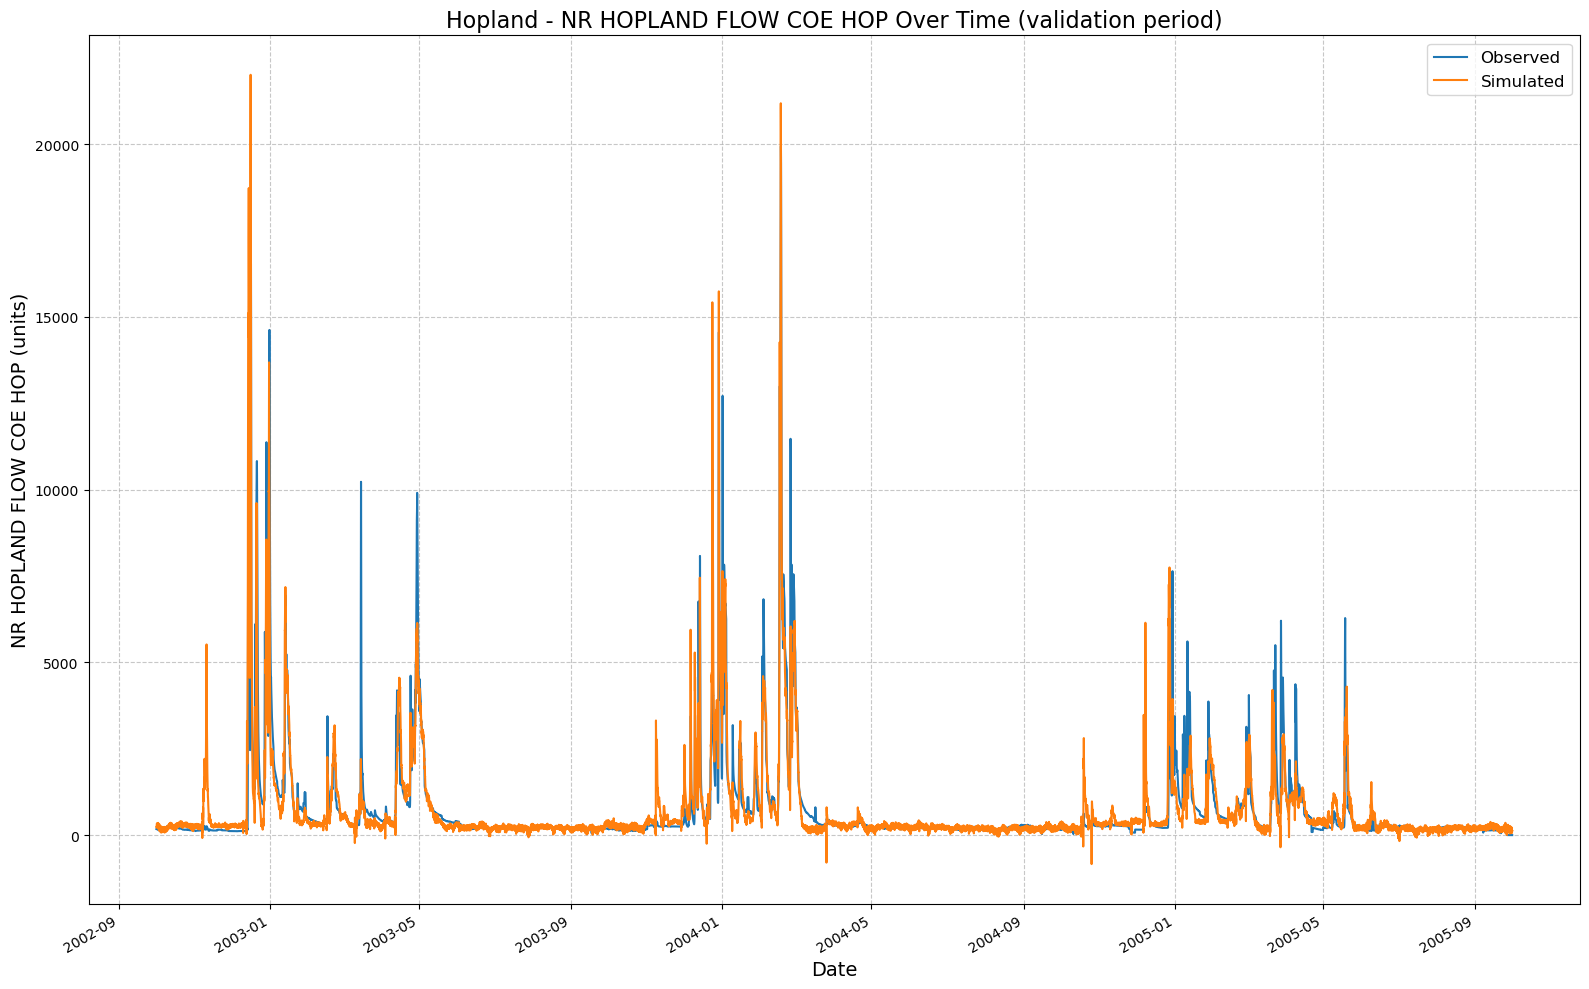

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_2801_234520\results_output_validation.csv


({'NSE': 0.7698821872472763,
  'MSE': 497729.1875,
  'RMSE': 705.4992469875499,
  'KGE': 0.8825271743237401,
  'Alpha-NSE': 0.9878209887036412,
  'Beta-KGE': 0.9897509813308716,
  'Beta-NSE': -0.0052595599386974,
  'Pearson-r': 0.8836105929539635,
  'FHV': -3.250103071331978,
  'FMS': -5.439995529556958,
  'FLV': -0.6869913930051975,
  'Peak-Timing': nan,
  'Peak-MAPE': 40.3012820652553},
 WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/hopland_all/runs/testing_run_2801_234520/results_output_validation.csv'))

In [8]:
lstmNoPhysicsHourly.results()

## Physics-informed LSTM, train on training subset, evaluate on evaluation period (for hyperparameter search)

In [10]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("hopland_gage.yaml")
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/Hopland_hourly.csv")
params = {
    "epochs":8,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from hourly.csv
    "RUSSIAN 60 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 60 PRECIP-INC SCREENED",
    "RUSSIAN 70 PRECIP-INC SCREENED",
    "RUSSIAN 70 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "WF RUSSIAN PRECIP-INC SCREENED",
    "WF RUSSIAN ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    #from hopland.csv
    'Hopland Gage FLOW',
    'Russian 60 ET-POTENTIAL',
    'Russian 60 FLOW',
    'Russian 60 FLOW-BASE',
    'Russian 60 INFILTRATION',
    'Russian 60 PERC-SOIL',
    'Russian 60 SATURATION FRACTION',
    'Russian 70 ET-POTENTIAL',
    'Russian 70 FLOW',
    'Russian 70 FLOW-BASE',
    'Russian 70 INFILTRATION',
    'Russian 70 PERC-SOIL',
    'Russian 70 SATURATION FRACTION',
    'WF Russian ET-POTENTIAL',
    'WF Russian FLOW',
    'WF Russian FLOW-BASE',
    'WF Russian INFILTRATION',
    'WF Russian PERC-SOIL',
    'WF Russian SATURATION FRACTION',
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "UKIAH CA FLOW USGS-MERGED",
    #"Lake Mendocino Storage",    
    ]
lstmPhysicsHourly = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=True)

In [11]:
lstmPhysicsHourly.train()

2025-01-28 23:49:05,063: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_2801_234905\output.log initialized.
2025-01-28 23:49:05,065: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_2801_234905
2025-01-28 23:49:05,067: ### Run configurations for testing_run
2025-01-28 23:49:05,068: experiment_name: testing_run
2025-01-28 23:49:05,070: train_basin_file: hopland
2025-01-28 23:49:05,071: validation_basin_file: hopland
2025-01-28 23:49:05,073: test_basin_file: hopland
2025-01-28 23:49:05,074: train_start_date: 1994-10-01 00:00:00
2025-01-28 23:49:05,075: train_end_date: 2002-09-30 00:00:00
2025-01-28 23:49:05,076: validation_start_date: 2002-10-01 00:00:00
2025-01-28 23:49:05,078: validation_end_date: 2005-09-30 00:00:00
2025-01-28 23:49:05,078: test_start_date: 2005-10-01 00:00:00
2025-01-28 23:49:05,080: test_end_date: 2009-09-29 00:00:00
2025-01-28 23:49:05,081: device: cpu
2025-01-28 23:49:05,082: phys

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mod

# Validation: 100%|██████████| 1/1 [00:08<00:00,  8.37s/it]
2025-01-28 23:53:07,735: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_2801_234905\validation\model_epoch008\validation_metrics.csv
2025-01-28 23:53:07,745: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_2801_234905\validation\model_epoch008\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/hopland_all/runs/testing_run_2801_234905')

Using basin: Hopland
Using target variable: NR HOPLAND FLOW COE HOP
Observed_key: NR HOPLAND FLOW COE HOP_obs
Simulated_key: NR HOPLAND FLOW COE HOP_sim


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead

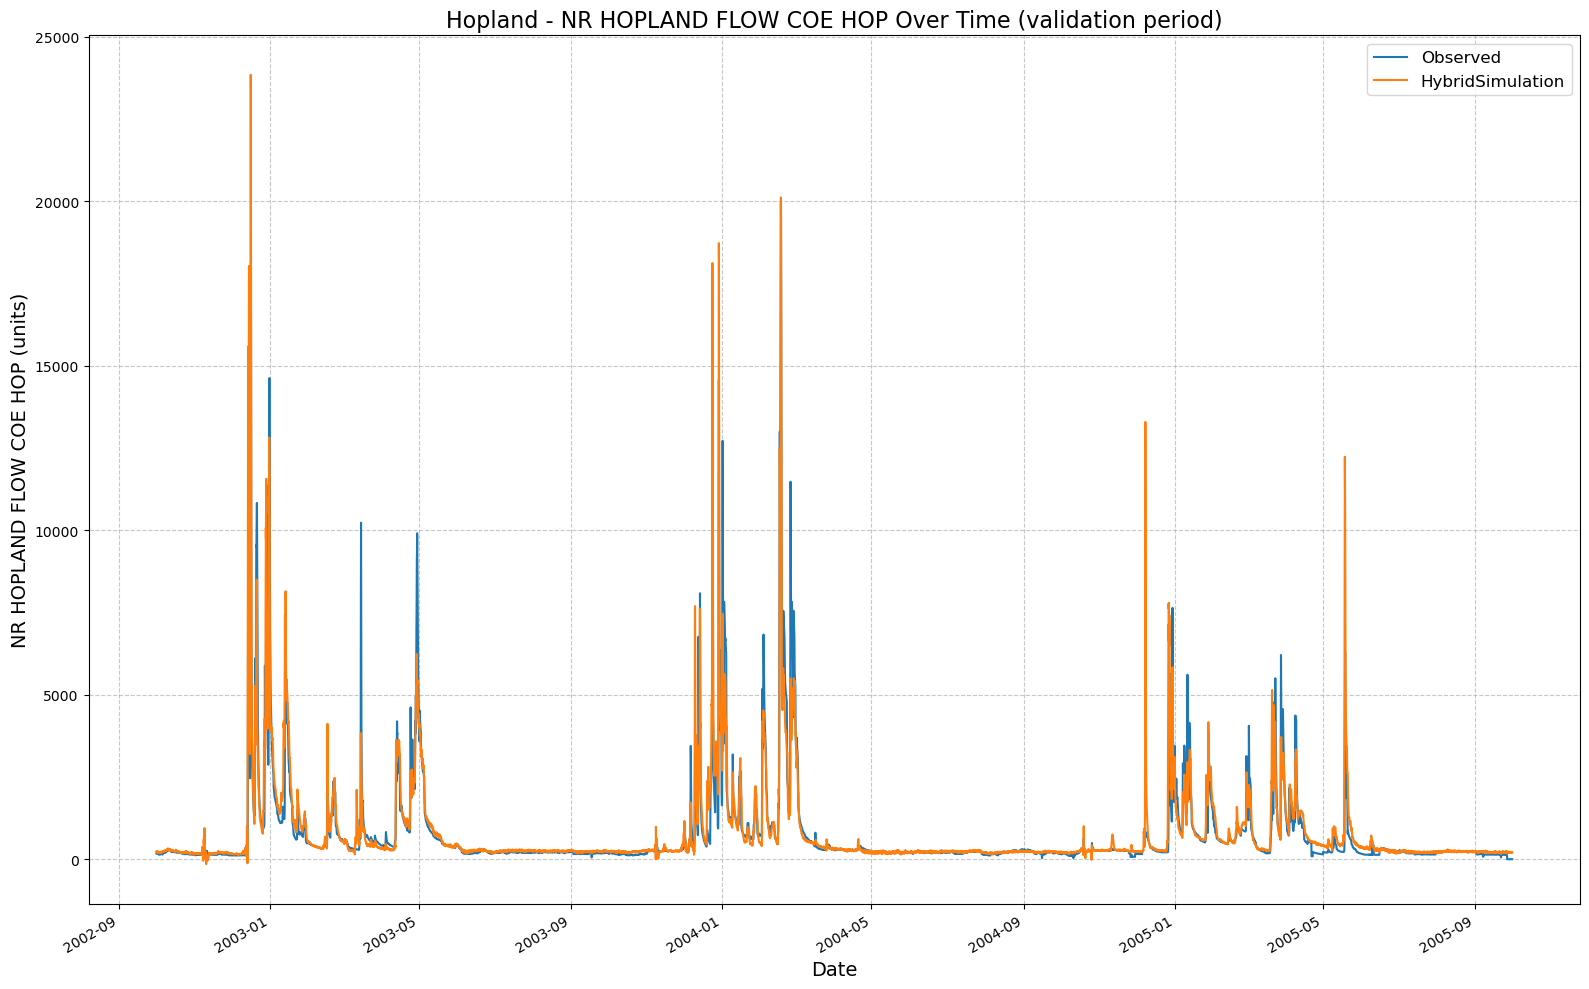

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_2801_234905\results_output_validation.csv


({'NSE': 0.8363896012306213,
  'MSE': 353878.1875,
  'RMSE': 594.8766153581767,
  'KGE': 0.8922202753345004,
  'Alpha-NSE': 1.016856472099083,
  'Beta-KGE': 1.070610761642456,
  'Beta-NSE': 0.036235857970798924,
  'Pearson-r': 0.9203353984657175,
  'FHV': -1.8506411463022232,
  'FMS': 0.7425704898524729,
  'FLV': -2.3811392796415998,
  'Peak-Timing': nan,
  'Peak-MAPE': 32.77394430977957},
 WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/hopland_all/runs/testing_run_2801_234905/results_output_validation.csv'))

In [12]:
lstmPhysicsHourly.results()

## Retrain LSTM on entire train period using best hyperparameters, evaluate on test period

In [20]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("hopland_gage.yaml")
params = {
    "epochs":16,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
#defaults to daily so need to specify hourly
lstmNoPhysicsHourlyExtended = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, hourly=True, extend_train_period=True)

In [22]:
lstmNoPhysicsHourlyExtended.train()

2025-01-29 05:15:03,163: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_2901_051503\output.log initialized.
2025-01-29 05:15:03,165: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_2901_051503
2025-01-29 05:15:03,167: ### Run configurations for testing_run
2025-01-29 05:15:03,168: experiment_name: testing_run
2025-01-29 05:15:03,170: train_basin_file: hopland
2025-01-29 05:15:03,171: validation_basin_file: hopland
2025-01-29 05:15:03,172: test_basin_file: hopland
2025-01-29 05:15:03,174: train_start_date: 1994-10-01 00:00:00
2025-01-29 05:15:03,175: train_end_date: 2005-09-30 00:00:00
2025-01-29 05:15:03,177: validation_start_date: 2002-10-01 00:00:00
2025-01-29 05:15:03,179: validation_end_date: 2005-09-30 00:00:00
2025-01-29 05:15:03,180: test_start_date: 2005-10-01 00:00:00
2025-01-29 05:15:03,182: test_end_date: 2009-09-29 00:00:00
2025-01-29 05:15:03,183: device: cpu
2025-01-29 05:15:03,184: phys

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mod

# Validation: 100%|██████████| 1/1 [00:05<00:00,  5.58s/it]
2025-01-29 05:25:22,509: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_2901_051503\validation\model_epoch016\validation_metrics.csv
2025-01-29 05:25:22,516: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_2901_051503\validation\model_epoch016\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/hopland_all/runs/testing_run_2901_051503')

2025-01-29 05:25:22,601: Using the model weights from F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_2901_051503\model_epoch016.pt


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mod

# Evaluation: 100%|██████████| 1/1 [00:06<00:00,  6.86s/it]
2025-01-29 05:25:29,470: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_2901_051503\test\model_epoch016\test_metrics.csv
2025-01-29 05:25:29,482: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_2901_051503\test\model_epoch016\test_results.p
Using basin: Hopland
Using target variable: NR HOPLAND FLOW COE HOP
Observed_key: NR HOPLAND FLOW COE HOP_obs
Simulated_key: NR HOPLAND FLOW COE HOP_sim


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead

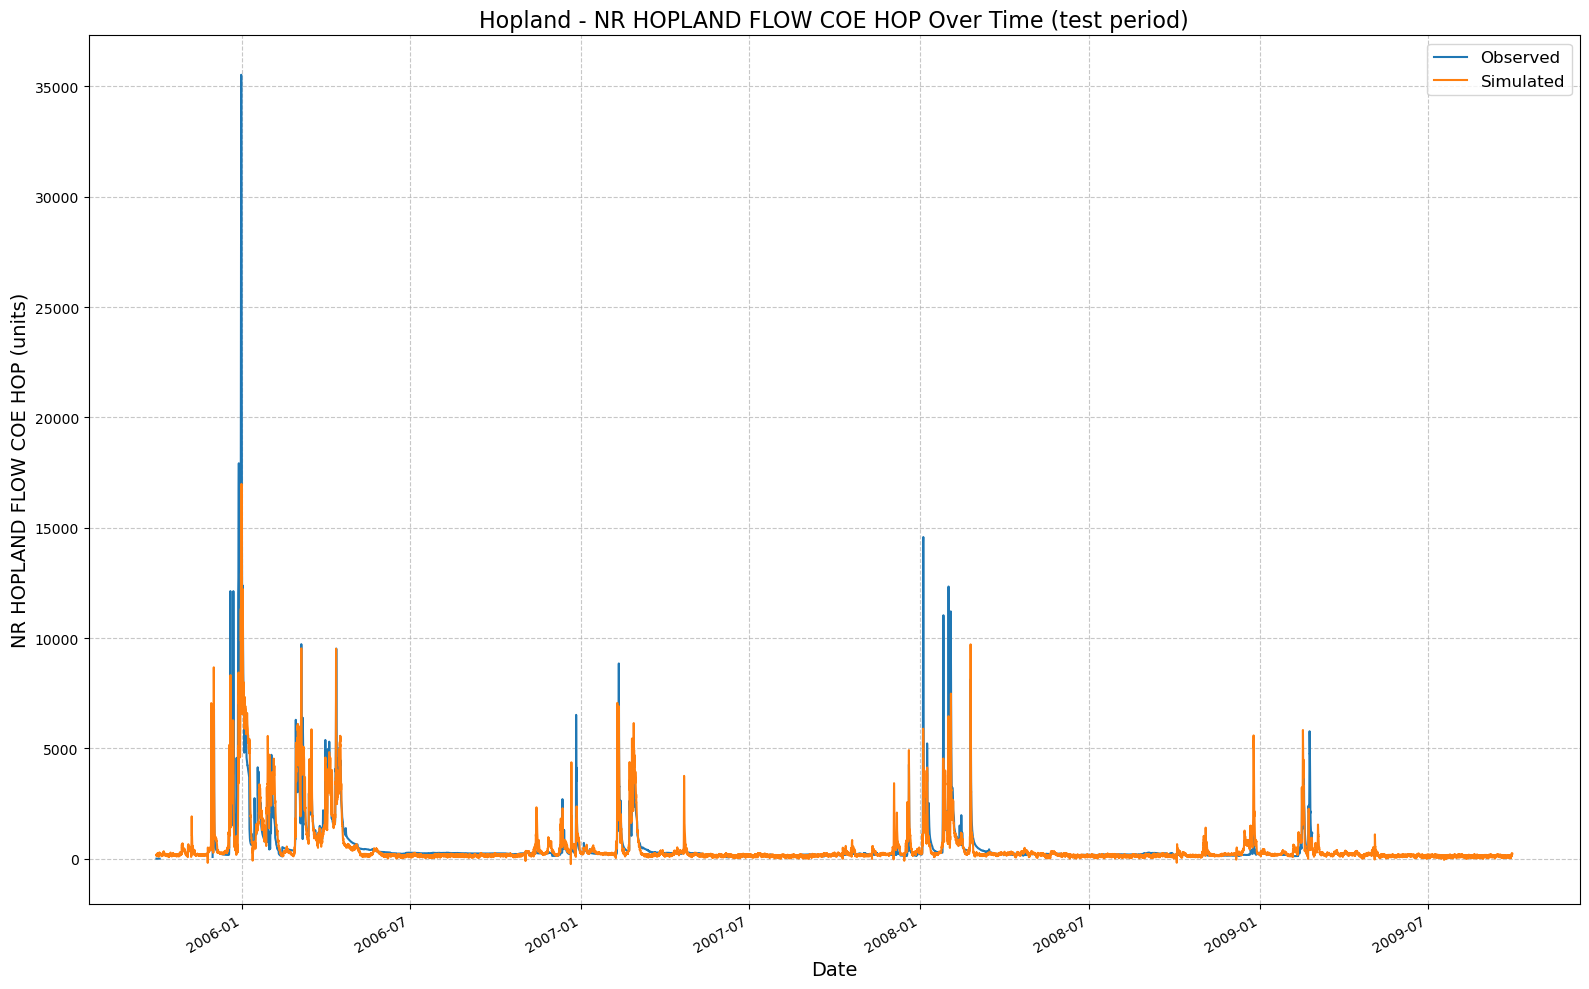

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_2901_051503\results_output_test.csv


In [23]:
lstm_result_metrics, lstm_result_path = lstmNoPhysicsHourlyExtended.results('test')

In [24]:
lstm_result_metrics

{'NSE': 0.7148741185665131,
 'MSE': 630995.0625,
 'RMSE': 794.351976456281,
 'KGE': 0.7389666637239531,
 'Alpha-NSE': 0.7910465299477457,
 'Beta-KGE': 0.9650381803512573,
 'Beta-NSE': -0.014261571764304282,
 'Pearson-r': 0.8475056684090382,
 'FHV': -20.681631565093994,
 'FMS': 39.02926056377998,
 'FLV': 0.20915189231481296,
 'Peak-Timing': nan,
 'Peak-MAPE': 40.52585518878439}

## Retrain PI-LSTM on entire train period using best hyperparameters, evaluate on test period

In [26]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("hopland_gage.yaml")
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/Hopland_hourly.csv")
params = {
    "epochs":16,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from hourly.csv
    "RUSSIAN 60 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 60 PRECIP-INC SCREENED",
    "RUSSIAN 70 PRECIP-INC SCREENED",
    "RUSSIAN 70 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "WF RUSSIAN PRECIP-INC SCREENED",
    "WF RUSSIAN ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    #from hopland.csv
    'Hopland Gage FLOW',
    'Russian 60 ET-POTENTIAL',
    'Russian 60 FLOW',
    'Russian 60 FLOW-BASE',
    'Russian 60 INFILTRATION',
    'Russian 60 PERC-SOIL',
    'Russian 60 SATURATION FRACTION',
    'Russian 70 ET-POTENTIAL',
    'Russian 70 FLOW',
    'Russian 70 FLOW-BASE',
    'Russian 70 INFILTRATION',
    'Russian 70 PERC-SOIL',
    'Russian 70 SATURATION FRACTION',
    'WF Russian ET-POTENTIAL',
    'WF Russian FLOW',
    'WF Russian FLOW-BASE',
    'WF Russian INFILTRATION',
    'WF Russian PERC-SOIL',
    'WF Russian SATURATION FRACTION',
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "UKIAH CA FLOW USGS-MERGED",
    #"Lake Mendocino Storage",    
    ]
#extend train period set to true
lstmPhysicsHourlyExtended = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=True, extend_train_period=True)

In [27]:
lstmPhysicsHourlyExtended.train()

2025-01-29 05:25:30,839: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_2901_052530\output.log initialized.
2025-01-29 05:25:30,841: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_2901_052530
2025-01-29 05:25:30,843: ### Run configurations for testing_run
2025-01-29 05:25:30,845: experiment_name: testing_run
2025-01-29 05:25:30,847: train_basin_file: hopland
2025-01-29 05:25:30,848: validation_basin_file: hopland
2025-01-29 05:25:30,850: test_basin_file: hopland
2025-01-29 05:25:30,853: train_start_date: 1994-10-01 00:00:00
2025-01-29 05:25:30,856: train_end_date: 2005-09-30 00:00:00
2025-01-29 05:25:30,858: validation_start_date: 2002-10-01 00:00:00
2025-01-29 05:25:30,860: validation_end_date: 2005-09-30 00:00:00
2025-01-29 05:25:30,861: test_start_date: 2005-10-01 00:00:00
2025-01-29 05:25:30,863: test_end_date: 2009-09-29 00:00:00
2025-01-29 05:25:30,864: device: cpu
2025-01-29 05:25:30,865: phys

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mod

# Validation: 100%|██████████| 1/1 [00:08<00:00,  8.22s/it]
2025-01-29 05:36:34,038: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_2901_052530\validation\model_epoch016\validation_metrics.csv
2025-01-29 05:36:34,048: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_2901_052530\validation\model_epoch016\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/hopland_all/runs/testing_run_2901_052530')

2025-01-29 07:35:59,345: Using the model weights from F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_2901_052530\model_epoch016.pt


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mod

# Evaluation: 100%|██████████| 1/1 [00:09<00:00,  9.72s/it]
2025-01-29 07:36:09,080: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_2901_052530\test\model_epoch016\test_metrics.csv
2025-01-29 07:36:09,092: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_2901_052530\test\model_epoch016\test_results.p
Using basin: Hopland
Using target variable: NR HOPLAND FLOW COE HOP
Observed_key: NR HOPLAND FLOW COE HOP_obs
Simulated_key: NR HOPLAND FLOW COE HOP_sim


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead

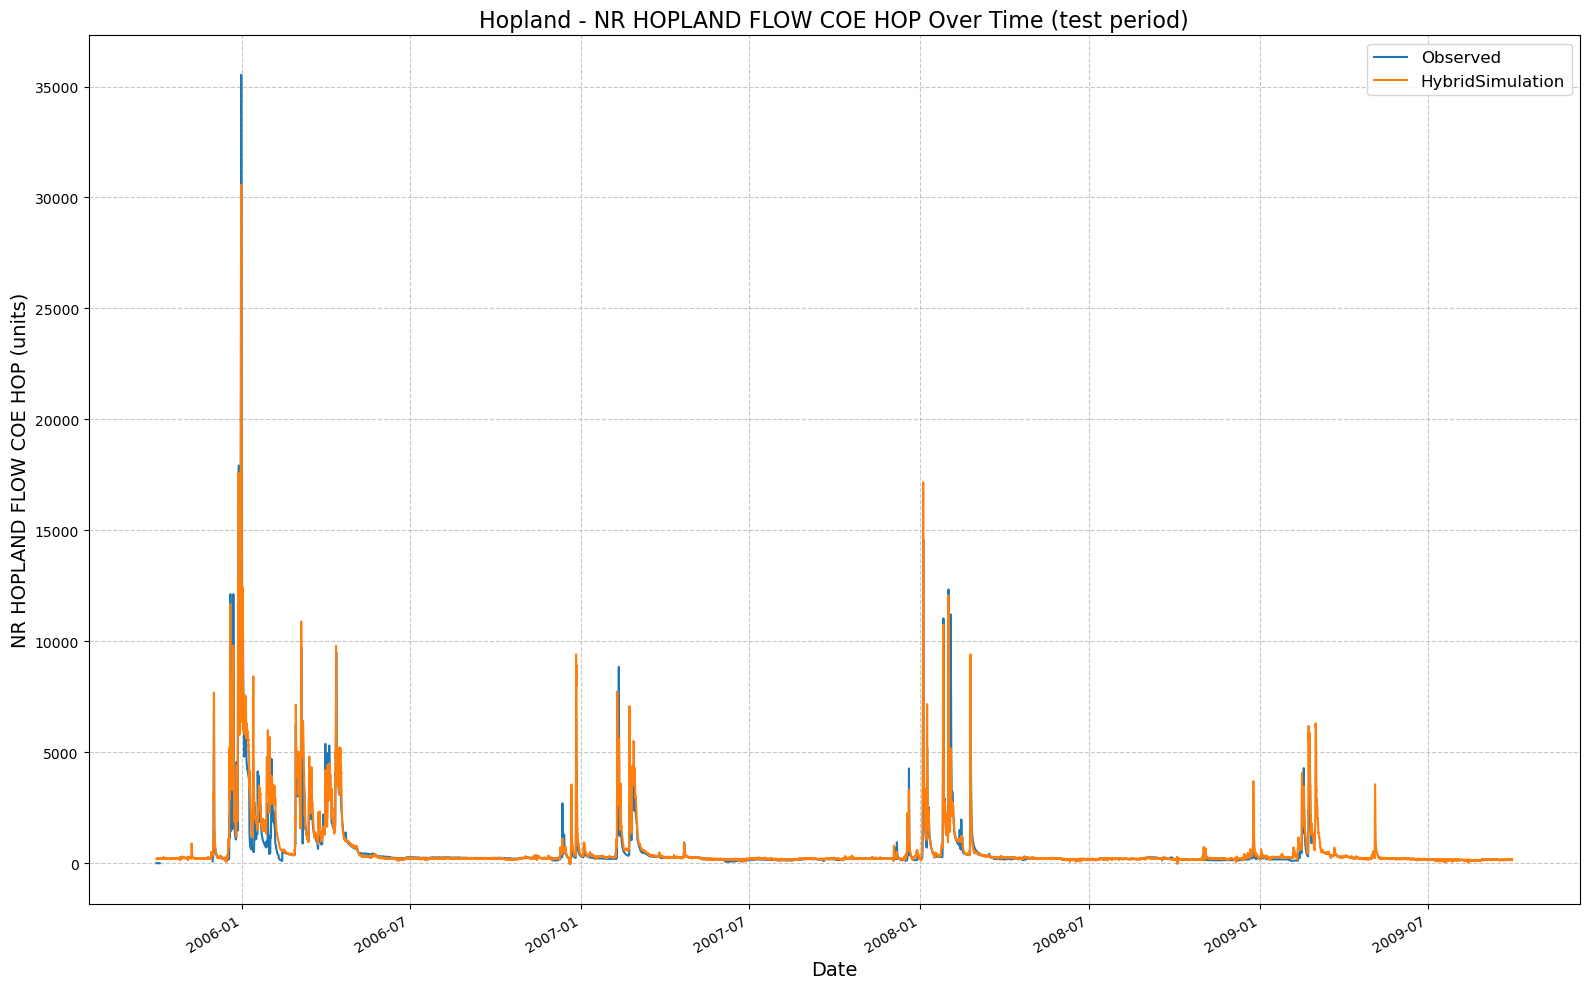

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_2901_052530\results_output_test.csv


In [38]:
physics_informed_result_metrics, physics_informed_result_path = lstmPhysicsHourlyExtended.results('test')

In [39]:
physics_informed_result_metrics

{'NSE': 0.8670041561126709,
 'MSE': 294325.125,
 'RMSE': 542.5173960344498,
 'KGE': 0.824449430309097,
 'Alpha-NSE': 1.0290771965181313,
 'Beta-KGE': 1.1616058349609375,
 'Beta-NSE': 0.06592200752304178,
 'Pearson-r': 0.9379027112667163,
 'FHV': 1.340219657868147,
 'FMS': 23.093117291970664,
 'FLV': -1.6898444122245628,
 'Peak-Timing': nan,
 'Peak-MAPE': 20.021100666212}

## Inspect results

In [41]:
    model1_df = pd.read_csv(lstm_result_path) #colums: Date, Observed, Predicted
    model1_df.head()

,Date,Observed,Predicted
0,2005-10-01 00:00:00,0.0,155.32648
1,2005-10-01 01:00:00,0.0,179.13702
2,2005-10-01 02:00:00,0.0,147.06293
3,2005-10-01 03:00:00,0.0,176.99146
4,2005-10-01 04:00:00,0.0,178.12988


In [42]:
    model2_df = pd.read_csv(physics_informed_result_path) #colums: Date, Observed, Predicted
    model1_df.head()

,Date,Observed,Predicted
0,2005-10-01 00:00:00,0.0,155.32648
1,2005-10-01 01:00:00,0.0,179.13702
2,2005-10-01 02:00:00,0.0,147.06293
3,2005-10-01 03:00:00,0.0,176.99146
4,2005-10-01 04:00:00,0.0,178.12988


In [43]:
    hms_df = clean_hourly(pd.read_csv(path_to_physics_data))
    hms_df.head()

C:\Users\Dino\AppData\Local\Temp\ipykernel_21948\3665493559.py:1: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  hms_df = clean_hourly(pd.read_csv(path_to_physics_data))


,Day,Time,Hopland Gage FLOW,Russian 60 ET-POTENTIAL,Russian 60 FLOW,Russian 60 FLOW-BASE,Russian 60 INFILTRATION,Russian 60 PERC-SOIL,Russian 60 SATURATION FRACTION,Russian 70 ET-POTENTIAL,...,Russian 70 FLOW-BASE,Russian 70 INFILTRATION,Russian 70 PERC-SOIL,Russian 70 SATURATION FRACTION,WF Russian ET-POTENTIAL,WF Russian FLOW,WF Russian FLOW-BASE,WF Russian INFILTRATION,WF Russian PERC-SOIL,WF Russian SATURATION FRACTION
date,,,,,,,,,,,,,,,,,,,,,
1994-10-01 01:00:00,1-Oct-94,01:00:00,153,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1994-10-01 02:00:00,1-Oct-94,02:00:00,153,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1994-10-01 03:00:00,1-Oct-94,03:00:00,153,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1994-10-01 04:00:00,1-Oct-94,04:00:00,153,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1994-10-01 05:00:00,1-Oct-94,05:00:00,153,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 ## Plot combined results

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\UCB_training\UCB_train.py:452: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  hms_df = clean_daily(pd.read_csv(HMS_results))


            date  Observed_Model1  Predicted_Model1  Observed_Model2  \
96432 2005-10-01              0.0         155.32648              0.0   
96433 2005-10-01              0.0         155.32648              0.0   
96434 2005-10-01              0.0         155.32648              0.0   
96435 2005-10-01              0.0         155.32648              0.0   
96436 2005-10-01              0.0         155.32648              0.0   

       Predicted_Model2  HMS_predicted  
96432         183.48914     222.199754  
96433         183.48914     222.313305  
96434         183.48914     222.505670  
96435         183.48914     222.739580  
96436         183.48914     222.989768  


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead

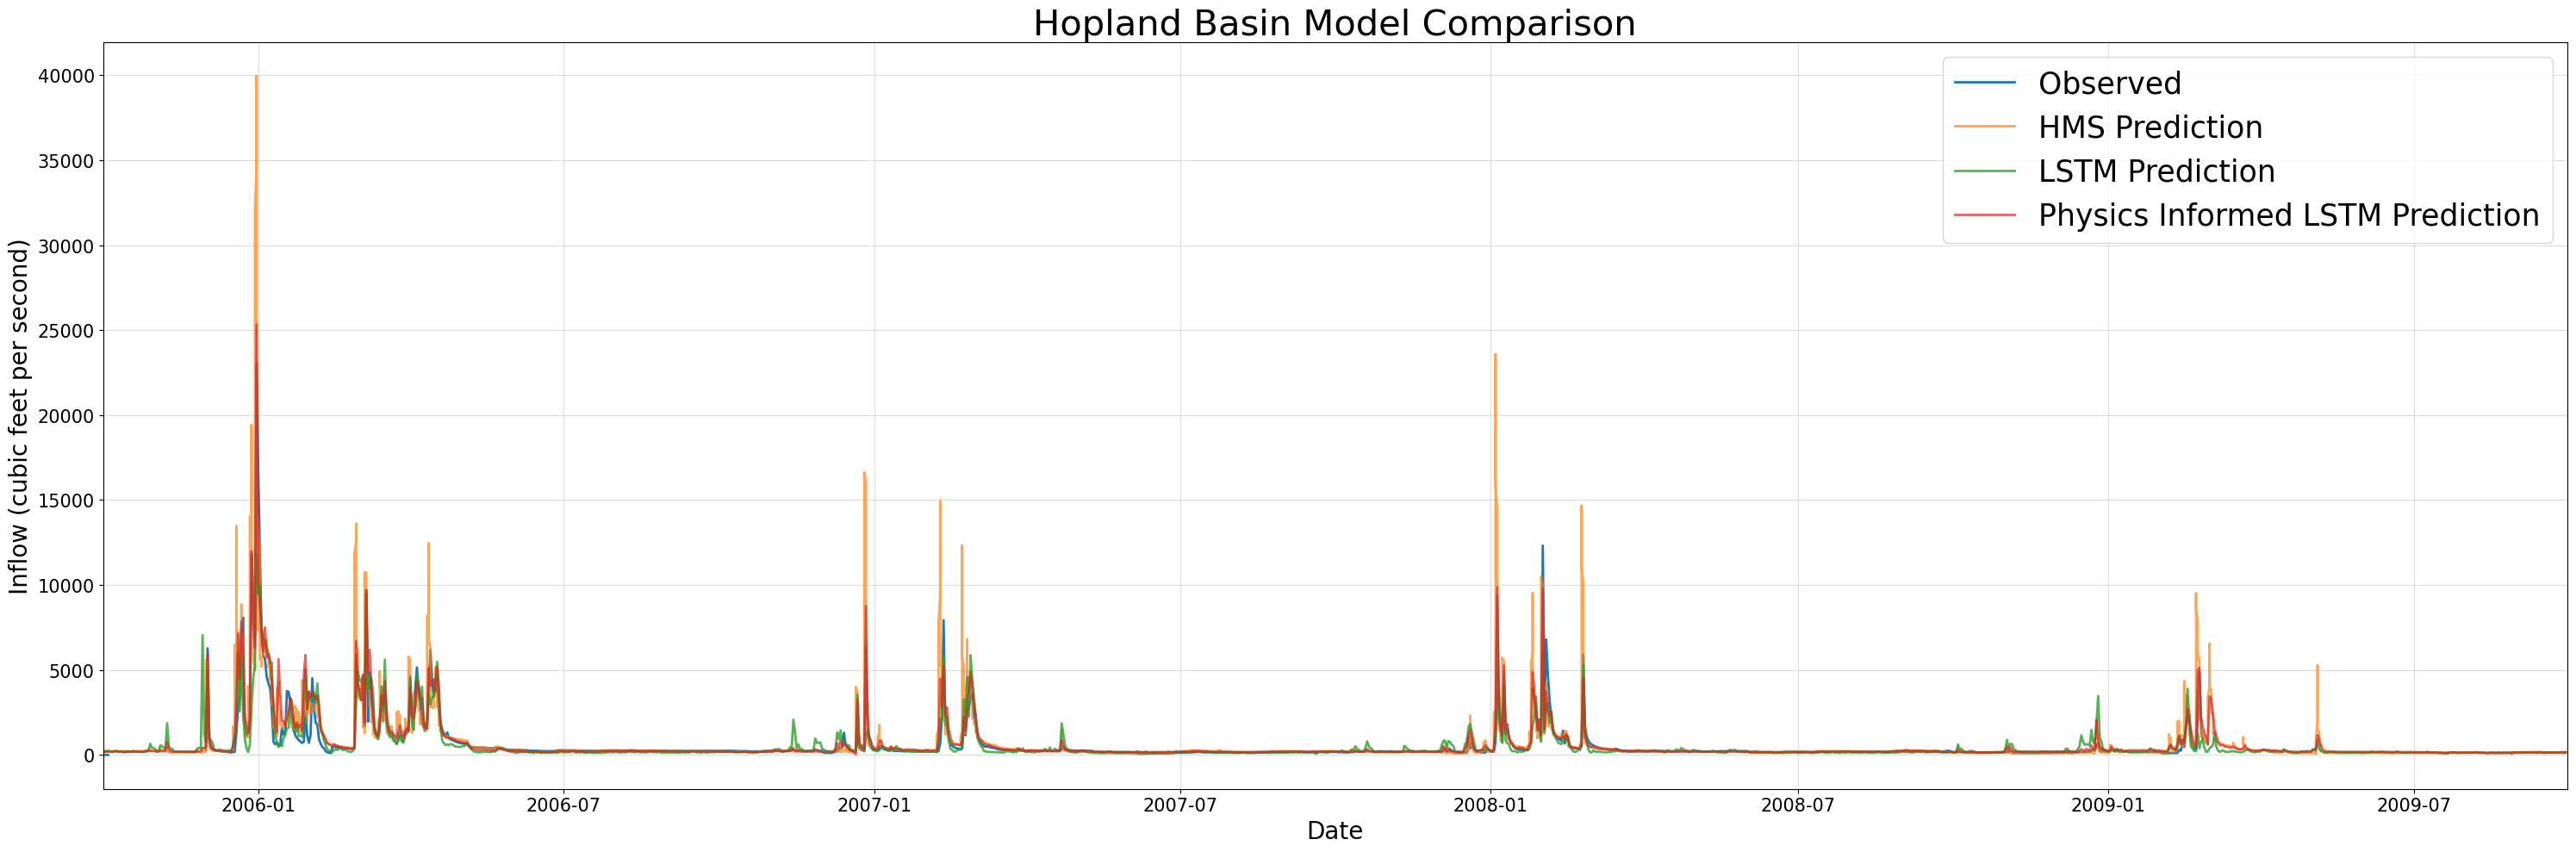

In [45]:
myplot, metrics_df = combinedPlot(lstm_results=lstm_result_path, lstmPhysics_results= physics_informed_result_path, HMS_results=path_to_physics_data, title='Hopland Basin Model Comparison', fName = "hopland_hourly_metrics.csv")

In [46]:
metrics_df

,HMS,LSTM,Physics_Informed_LSTM
NSE,3.496771e-01,0.718304,0.869357
MSE,1.377127e+06,596521.623364,276651.046713
RMSE,1.173511e+03,772.348123,525.976280
KGE,6.272454e-01,0.744692,0.842847
Alpha-NSE,1.230456e+00,0.797808,1.029665
Beta-KGE,1.167108e+00,0.960293,1.141645
Beta-NSE,7.072403e-02,-0.016805,0.059948
Pearson-r,7.593531e-01,0.849254,0.938733
FHV,1.931838e+01,-24.000402,-3.225362
FMS,2.729268e+01,42.588598,22.467656
